*Creado por:*

*Isabel Maniega*

# Ejercicio 2

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:2].valuescfdx
y = dataset.iloc[:, 2].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Lineal y Polinomial Regression

In [6]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Probaremos con un nivel de 6.5 para saber el sueldo que debería de ganar, viendo el sueldo en la tabla, debería estar entre 200.000 y 300.000, entre el puesto de Partner y Senior Partner

In [8]:
# Predicting a new result with Linear Regression

lin_reg.predict([[6.5]])

array([330378.78787879])

In [9]:
# Predicting a new result with Linear Regression

lin_reg.predict(X_test)

array([ 47303.03030303, 532575.75757576])

In [10]:
# Predicting a new result with Polynomial Regression

lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])

In [11]:
lin_reg_2.predict(poly_reg.fit_transform(X_test))

array([ 58642.19114217, 528694.6386945 ])

In [12]:
print("Valor de pendiente o coeficiente 'a':")
print(lin_reg_2.coef_)

Valor de pendiente o coeficiente 'a':
[      0.         -211002.33100293   94765.44289063  -15463.28671331
     890.15151515]


In [13]:
print("Precisión del modelo: ")
print(lin_reg_2.score(X_poly, y))

Precisión del modelo: 
0.9973922891706615


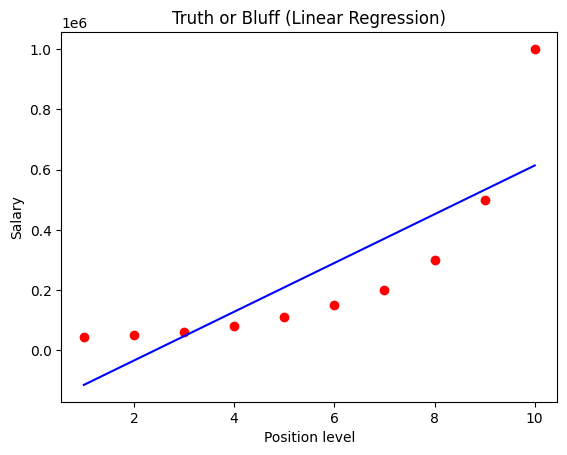

In [14]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

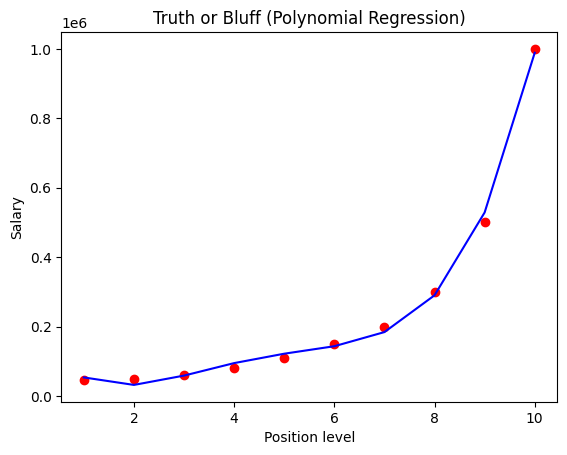

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


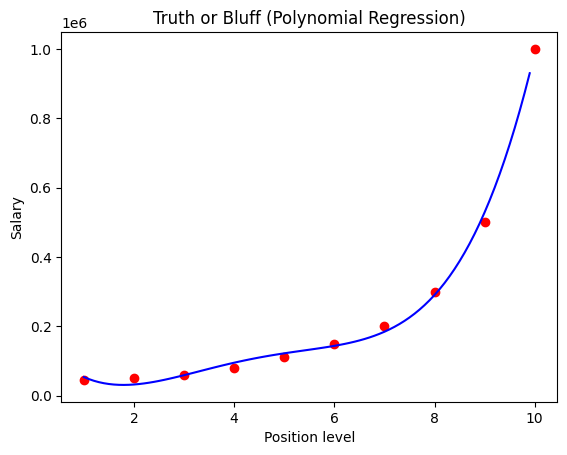

In [16]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Support Vector Regression (SVR)

In [17]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
# regressor = SVR(kernel="linear", C=1.0, epsilon=0.2)
regressor.fit(X, y)

SVR()

In [18]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([130001.82883924])

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([129996.54009563, 130003.51550835])

In [20]:
print("DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN")
print()

print("Precisión del modelo:")
print(regressor.score(X_train, y_train))

DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo:
-0.1415131652565642


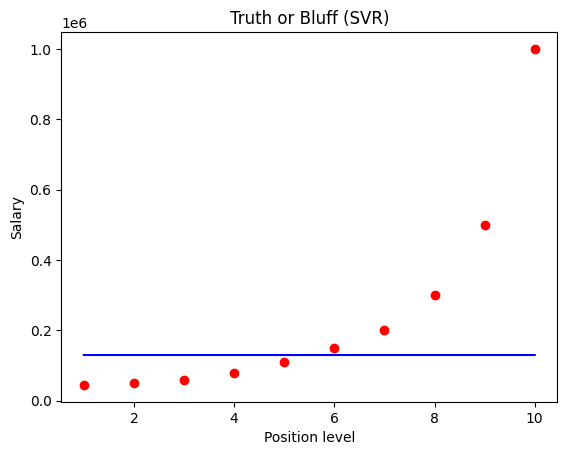

In [21]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


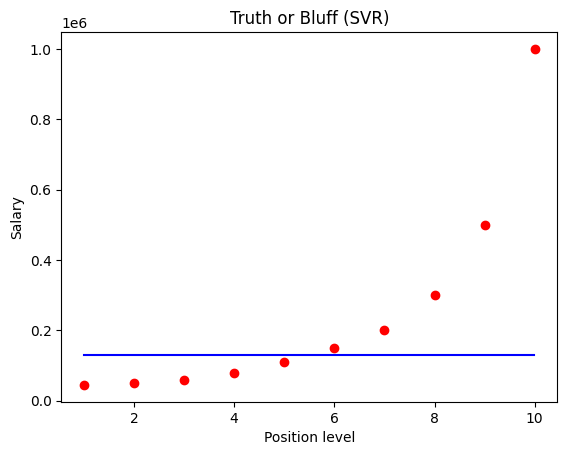

In [22]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Regression

In [23]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [24]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([ 60000., 500000.])

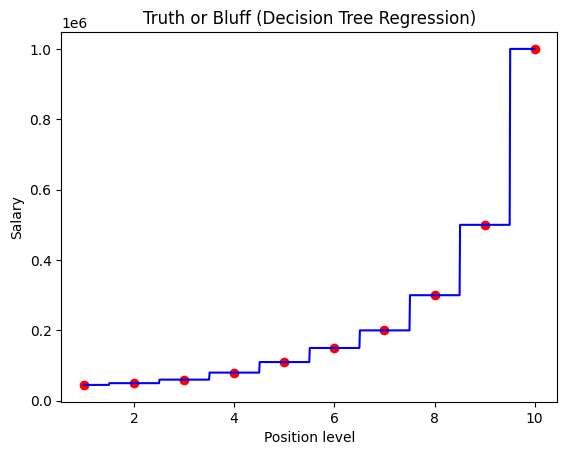

In [26]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
print("Datos del Modelo de árboles de decision Regresión")
print()

print("Precisión del modelo:")
print(regressor.score(X_train, y_train))

Datos del Modelo de árboles de decision Regresión

Precisión del modelo:
1.0


# Random Forest Regression

In [28]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [29]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([167000.])

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([ 59000., 470000.])

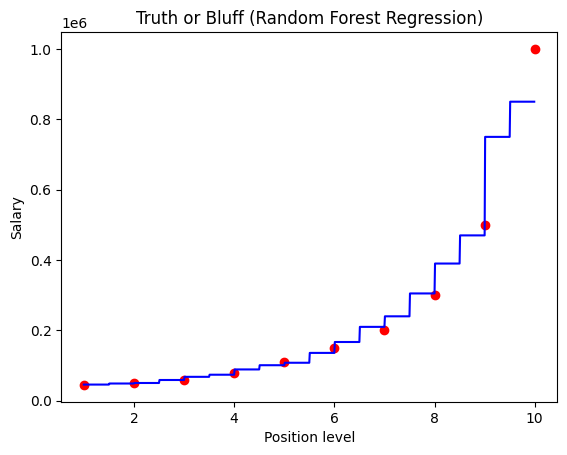

In [31]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [32]:
print("Datos del modelo Bosques Aleatorios Regresión")
print()

print("precisión del modelo:")
print(regressor.score(X_train, y_train))

Datos del modelo Bosques Aleatorios Regresión

precisión del modelo:
0.9675758285151437


**Conclusión**

Los dos mejores modelos son el Polinomial y el Random Forest, como la precisión es más alta nos quedaremos con Polinomial

*Creado por:*

*Isabel Maniega*